In [1]:
%pwd

'/media/rakin/Rakin/Thesis/MachineFairness/ContexualFairness/2023-3Fall/MissingValueDisparity/defense'

In [2]:
%cd /media/rakin/Rakin/Thesis/MachineFairness/ContexualFairness/2023-3Fall/MissingValueDisparity/

/media/rakin/Rakin/Thesis/MachineFairness/ContexualFairness/2023-3Fall/MissingValueDisparity


/media/rakin/Rakin/Thesis/MachineFairness/ContexualFairness/2023-3Fall/MissingValueDisparity/myvenv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [4]:
out_dir = 'outputs/'

In [5]:
stat_to_str = {'acc': 'accuracy', 'sr': 'selection rates', 'fpr': 'false poisitive rates'}

In [6]:
def plot_three_figures(grouping):
    for stat in ['acc', 'sr', 'fpr']:
        grouped = df.groupby(grouping)
        # bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive', 'tab:brown']
        width = 0.85 / len(grouped)
        for i, (tup, grp) in enumerate(grouped):
            grp[f'sp_{stat}'] = grp[f'sp_{stat}'].apply(np.abs)
            baseline = grp[grp['method'] == 'baseline'] 
            grp = grp[grp['method'] != 'baseline']
            plt.bar(np.arange(len(grp)) + width * i , grp[f'sp_{stat}'] - baseline.iloc[0][f'sp_{stat}'], width=width,
                   label=tup)
        print(np.arange(len(grp)) + width * len(grouped) // 2, width * 1.0 * (len(grouped)//2))
        plt.xticks(np.arange(len(grp)) + width * (len(grouped) // 2), grp['method'], fontsize=14)
        plt.yticks(fontsize=14)
        plt.legend(title=grouping.title())
        plt.axhline(0, color='black', linestyle='dashed')
        plt.xlabel('Repair Technique', fontsize=14)
        plt.ylabel(f'Change of disparity in {stat_to_str[stat]}', fontsize=14)
        plt.tight_layout()
        target_dir = out_dir + f'standard/{db}/figures/{grouping}/'
        os.makedirs(target_dir, exist_ok=True)
        plt.savefig(f'{target_dir}/{stat}.pdf')
        plt.show()
        plt.clf()

In [7]:
db = 'pima'
df = pd.read_csv(f'outputs/standard/{db}/tables/strategies.tsv', sep='\t', header=None)
df.columns = ['strategies'] + ['method', 'sp_acc', 'sp_acc_var', 'sp_sr', 'sp_sr_var', 'sp_fpr', 'sp_fpr_var']
strategies = [1] * 6 + [2] * 6 + [3] * 6
df['strategies'] = strategies
df

,strategies,method,sp_acc,sp_acc_var,sp_sr,sp_sr_var,sp_fpr,sp_fpr_var
0,1,baseline,7.72,10.27,-21.09,11.25,-15.96,13.31
1,1,drop,6.88,11.29,-21.73,13.26,-16.21,12.58
2,1,mean,7.45,11.50,-21.71,11.87,-16.40,13.91
3,1,mice,7.45,11.50,-21.71,11.87,-16.40,13.91
4,1,knn,7.18,11.15,-21.02,10.15,-15.42,13.21
5,1,softimpute,7.94,11.70,-21.91,12.39,-17.53,16.15
6,2,baseline,7.72,10.27,-21.09,11.25,-15.96,13.31
7,2,drop,8.85,10.41,-21.75,12.19,-18.00,15.53
8,2,mean,8.16,11.01,-22.12,13.33,-18.51,15.77
9,2,mice,7.64,10.44,-21.60,12.69,-16.93,13.12


[0. 1. 2. 3. 4.] 0.2833333333333333


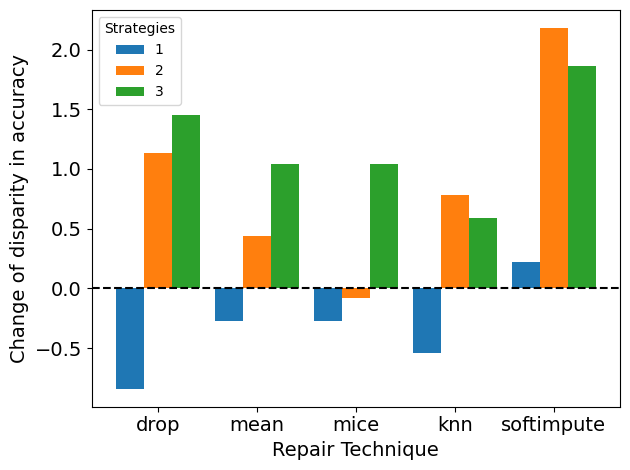

[0. 1. 2. 3. 4.] 0.2833333333333333


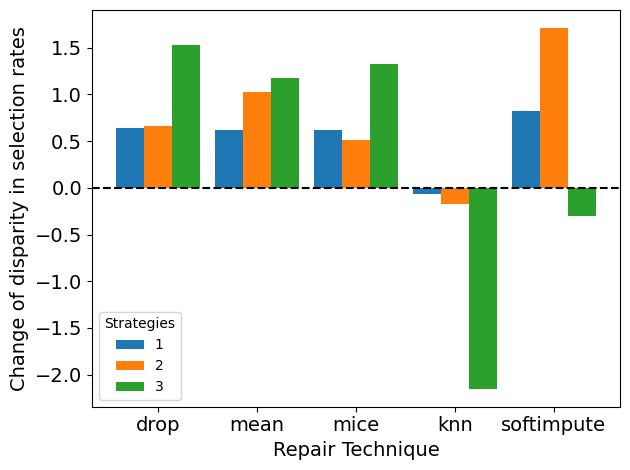

[0. 1. 2. 3. 4.] 0.2833333333333333


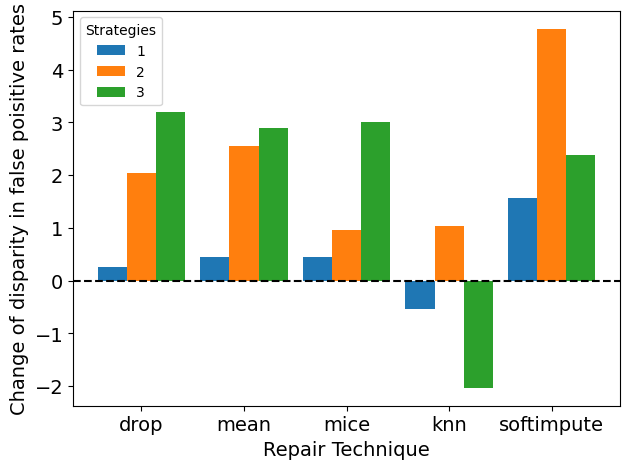

<Figure size 640x480 with 0 Axes>

In [8]:
plot_three_figures('strategies')

In [9]:
db = 'pima'
df = pd.read_csv(f'outputs/standard/{db}/tables/sota_cls_perf.tsv', sep='\t', header=None)
df.columns = ['classifiers'] + ['method', 'sp_acc', 'sp_acc_var', 'sp_sr', 'sp_sr_var', 'sp_fpr', 'sp_fpr_var']
classifiers = [[i]*6 for i in ['NB', 'SVM', 'LR', 'DT', 'NN', 'PR', 'RBC']]
df['classifiers'] = sum(classifiers, [])
df = df[df['classifiers'] != 'LR']
df = df[df['classifiers'] != 'DT']
df

,classifiers,method,sp_acc,sp_acc_var,sp_sr,sp_sr_var,sp_fpr,sp_fpr_var
0,NB,baseline,7.72,10.27,-21.09,11.25,-15.96,13.31
1,NB,drop,9.17,10.09,-22.62,13.23,-19.16,17.23
2,NB,mean,8.76,11.00,-22.26,12.61,-18.86,15.45
3,NB,mice,8.76,11.02,-22.41,12.75,-18.96,15.74
4,NB,knn,8.31,10.60,-18.94,11.63,-13.93,13.09
5,NB,softimpute,9.58,8.09,-20.79,12.95,-18.34,15.53
6,SVM,baseline,-3.65,9.63,0.75,10.06,-4.41,10.68
7,SVM,drop,1.85,10.72,-5.39,12.06,-11.71,13.54
8,SVM,mean,2.41,9.68,-6.19,12.89,-8.09,20.67
9,SVM,mice,1.10,8.86,-2.27,9.36,-5.92,11.70


[0. 1. 2. 3. 4.] 0.33999999999999997


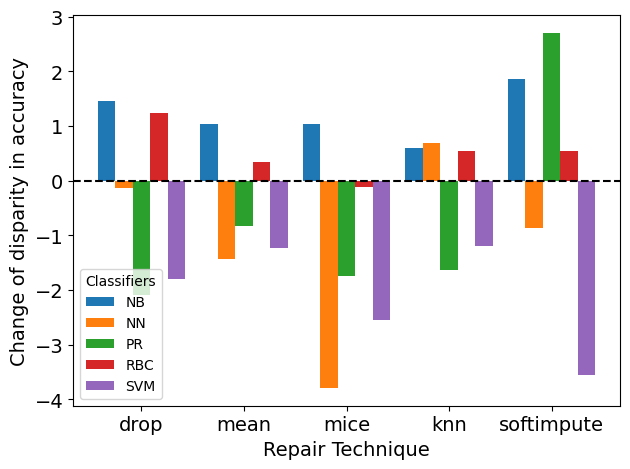

[0. 1. 2. 3. 4.] 0.33999999999999997


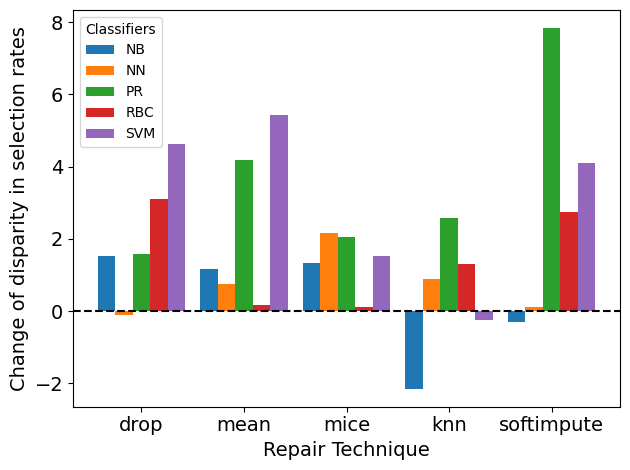

[0. 1. 2. 3. 4.] 0.33999999999999997


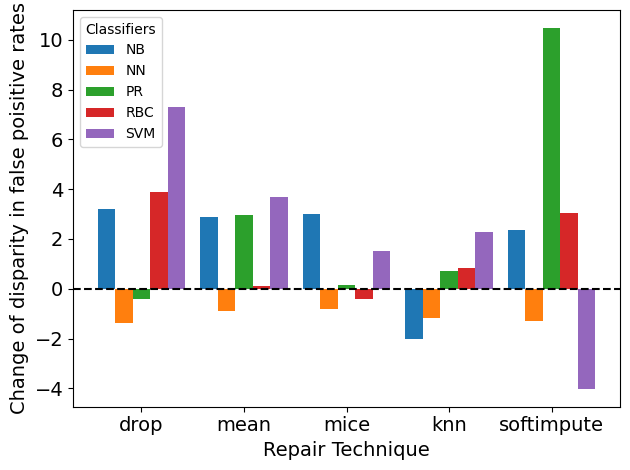

<Figure size 640x480 with 0 Axes>

In [10]:
plot_three_figures('classifiers')

In [11]:
def plot_classifiers():
    for stat in ['acc', 'sr', 'fpr']:
        grouped = df.groupby('classifiers')
        bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive', 'tab:brown']
        width = 0.85 / len(grouped)
        for i, (tup, grp) in enumerate(grouped):
            grp[f'sp_{stat}'] = grp[f'sp_{stat}'].apply(np.abs)
            baseline = grp[grp['method'] == 'baseline'] 
            grp = grp[grp['method'] != 'baseline']
            print(tup, stat)
            print(grp[f'sp_{stat}'] - baseline.iloc[0][f'sp_{stat}'])
            plt.bar(np.arange(len(grp)), grp[f'sp_{stat}'] - baseline.iloc[0][f'sp_{stat}'], color=bar_colors)
            # plt.hlines(xmin=-1, xmax=10, y=baseline.iloc[0][f'sp_{stat}'], linestyle='--', color='black', label='baseline')
            # if grp[f'sp_{stat}'].min() == 0:
            #     plt.ylim(0, grp[f'sp_{stat}'].max() + 2)
            # if grp[f'sp_{stat}'].min() == 0:
            #     plt.ylim(grp[f'sp_{stat}'].min() - 1, grp[f'sp_{stat}'].max() + 2)
            plt.xticks(range(len(grp)), grp['method'].values)
            plt.tight_layout()
            target_dir = out_dir + f'standard/{db}/figures/classifiers/'
        
            os.makedirs(target_dir, exist_ok=True)
            plt.savefig(f'{target_dir}/{tup}_{stat}.pdf')
            plt.show()
            plt.clf()

NB acc
1    1.45
2    1.04
3    1.04
4    0.59
5    1.86
Name: sp_acc, dtype: float64


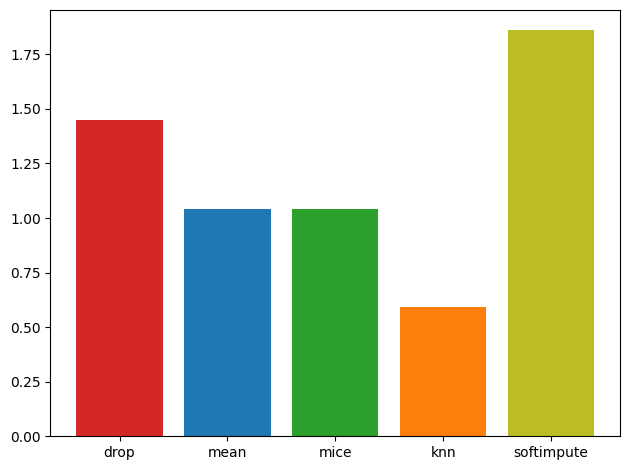

NN acc
25   -0.13
26   -1.43
27   -3.79
28    0.69
29   -0.86
Name: sp_acc, dtype: float64


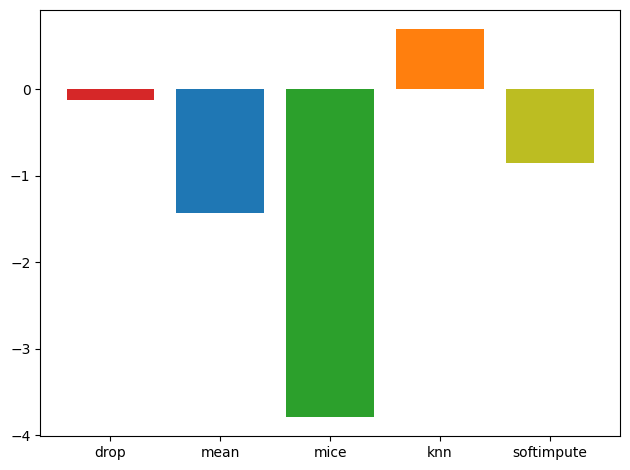

PR acc
31   -2.09
32   -0.82
33   -1.75
34   -1.63
35    2.70
Name: sp_acc, dtype: float64


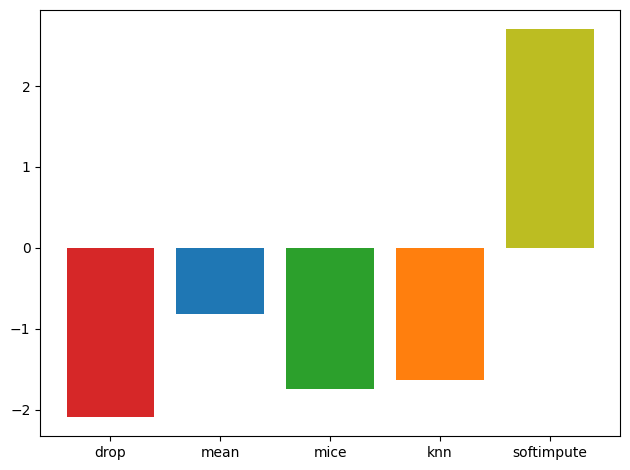

RBC acc
37    1.23
38    0.34
39   -0.12
40    0.55
41    0.55
Name: sp_acc, dtype: float64


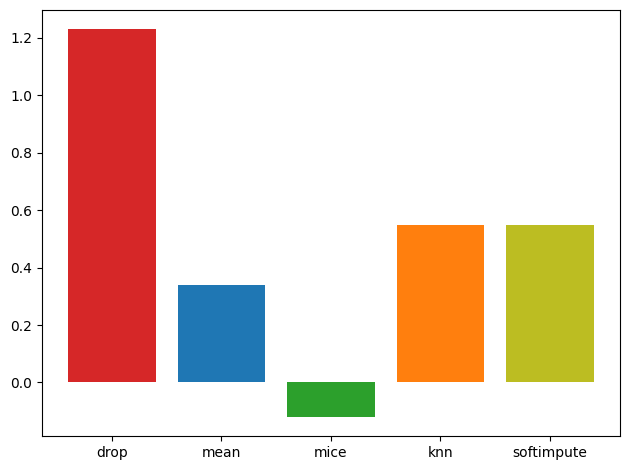

SVM acc
7    -1.80
8    -1.24
9    -2.55
10   -1.19
11   -3.56
Name: sp_acc, dtype: float64


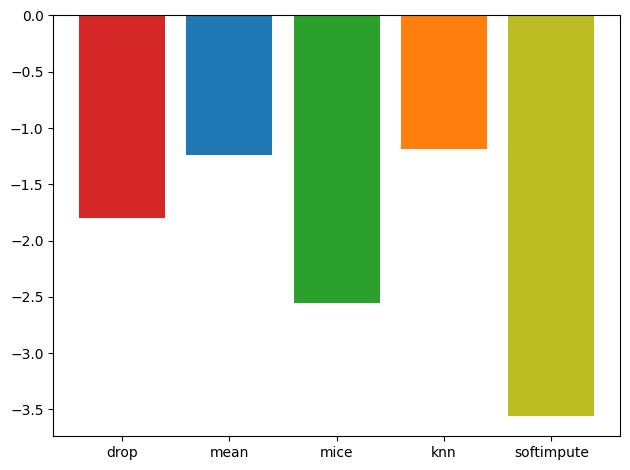

NB sr
1    1.53
2    1.17
3    1.32
4   -2.15
5   -0.30
Name: sp_sr, dtype: float64


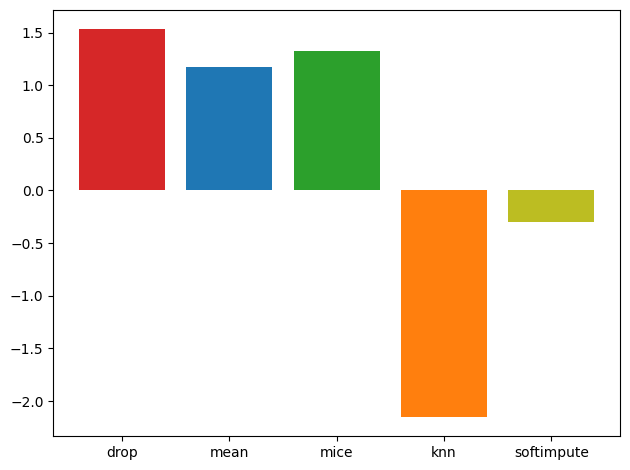

NN sr
25   -0.10
26    0.74
27    2.16
28    0.88
29    0.10
Name: sp_sr, dtype: float64


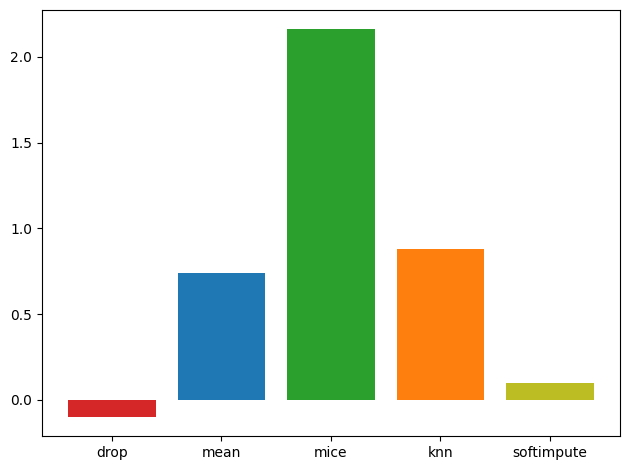

PR sr
31    1.57
32    4.19
33    2.06
34    2.58
35    7.84
Name: sp_sr, dtype: float64


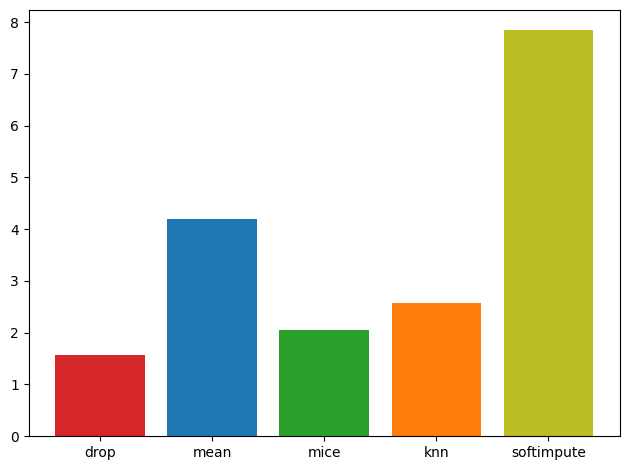

RBC sr
37    3.11
38    0.18
39    0.10
40    1.29
41    2.75
Name: sp_sr, dtype: float64


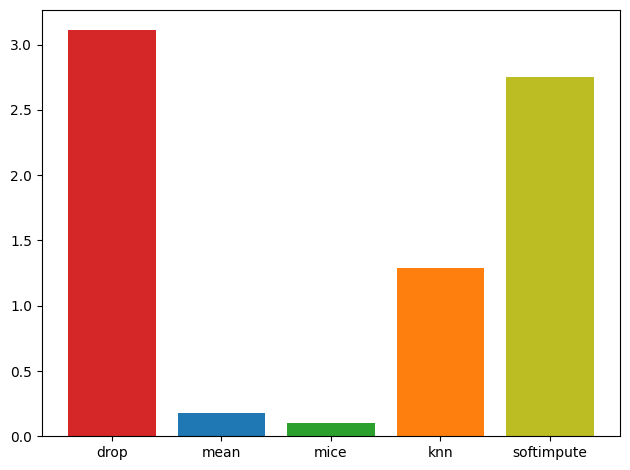

SVM sr
7     4.64
8     5.44
9     1.52
10   -0.26
11    4.11
Name: sp_sr, dtype: float64


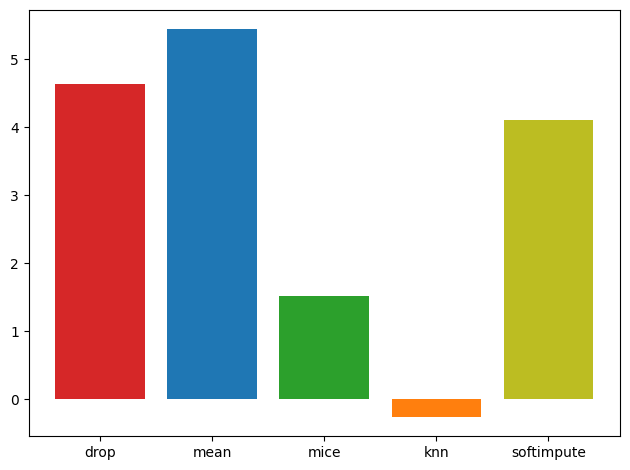

NB fpr
1    3.20
2    2.90
3    3.00
4   -2.03
5    2.38
Name: sp_fpr, dtype: float64


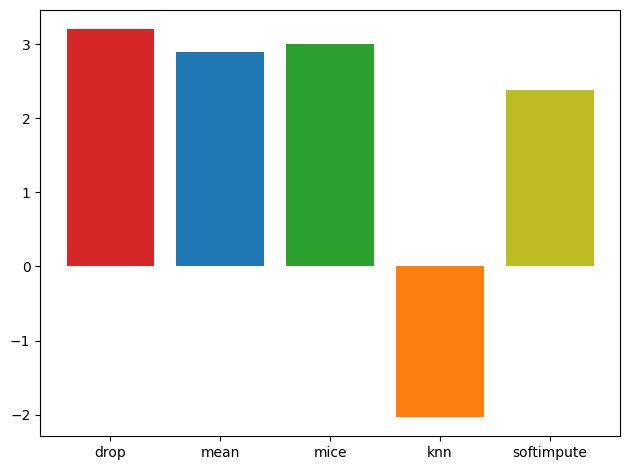

NN fpr
25   -1.39
26   -0.89
27   -0.83
28   -1.18
29   -1.30
Name: sp_fpr, dtype: float64


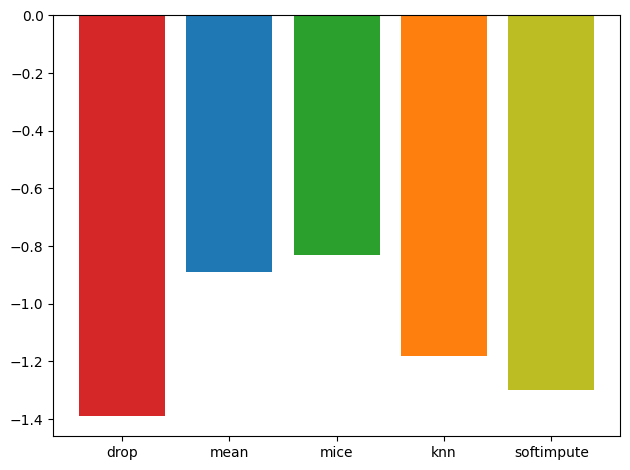

PR fpr
31    -0.41
32     2.95
33     0.17
34     0.71
35    10.47
Name: sp_fpr, dtype: float64


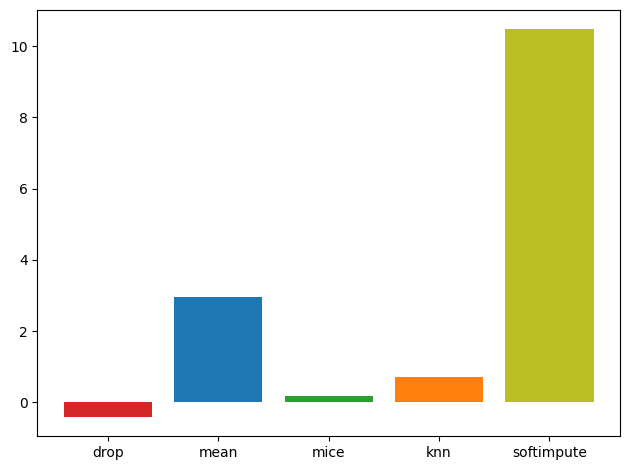

RBC fpr
37    3.89
38    0.10
39   -0.42
40    0.82
41    3.04
Name: sp_fpr, dtype: float64


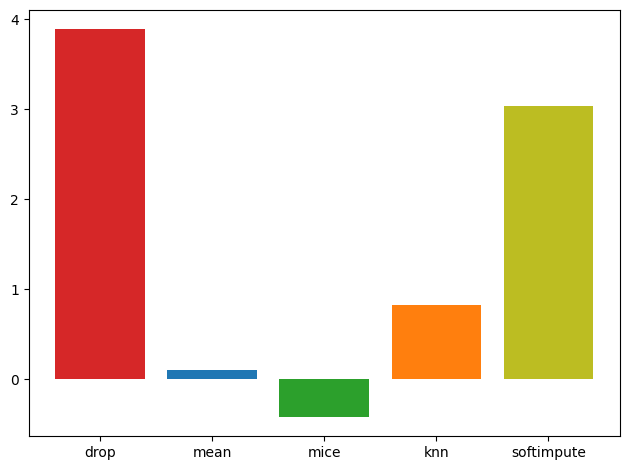

SVM fpr
7     7.30
8     3.68
9     1.51
10    2.28
11   -4.01
Name: sp_fpr, dtype: float64


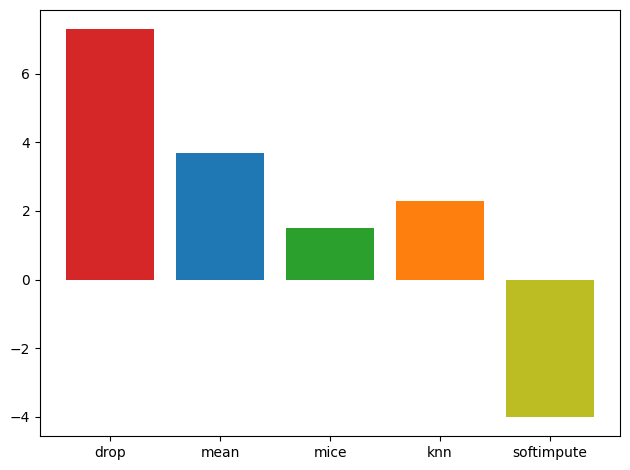

<Figure size 640x480 with 0 Axes>

In [12]:
plot_classifiers()

In [13]:
db = 'folkincome'
df = pd.read_csv(f'outputs/standard/{db}/tables/sota_cls_perf.tsv', sep='\t', header=None)
df.columns = ['classifiers'] + ['method', 'sp_acc', 'sp_acc_var', 'sp_sr', 'sp_sr_var', 'sp_fpr', 'sp_fpr_var']
classifiers = [[i]*6 for i in ['NB', 'SVM', 'LR', 'DT', 'NN', 'PR', 'RBC']]
df['classifiers'] = sum(classifiers, [])
df = df[df['classifiers'] != 'LR']
df = df[df['classifiers'] != 'DT']
df

,classifiers,method,sp_acc,sp_acc_var,sp_sr,sp_sr_var,sp_fpr,sp_fpr_var
0,NB,baseline,3.30,0.41,-17.29,0.60,-12.25,0.81
1,NB,drop,3.49,0.48,-16.81,0.64,-11.54,0.93
2,NB,mean,3.11,0.41,-16.88,0.60,-11.63,0.82
3,NB,mice,3.27,0.44,-16.92,0.60,-11.69,0.87
4,NB,knn,3.71,0.56,-18.36,1.13,-13.64,1.65
5,NB,softimpute,5.76,0.41,-23.82,0.53,-20.76,0.71
6,SVM,baseline,3.72,9.26,-0.32,4.08,-0.42,1.97
7,SVM,drop,1.90,10.72,-0.31,3.10,0.38,1.48
8,SVM,mean,3.66,7.47,-0.62,4.40,-0.20,1.62
9,SVM,mice,4.77,7.49,-2.55,3.40,-0.53,1.60


NB acc
1    0.19
2   -0.19
3   -0.03
4    0.41
5    2.46
Name: sp_acc, dtype: float64


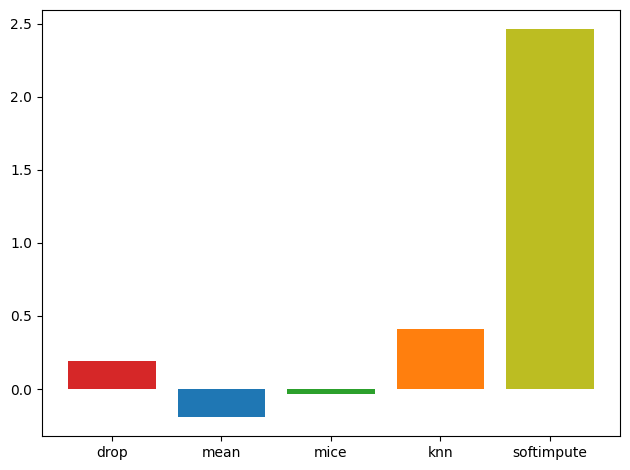

NN acc
25    0.08
26   -0.44
27   -1.19
28    0.35
29    2.37
Name: sp_acc, dtype: float64


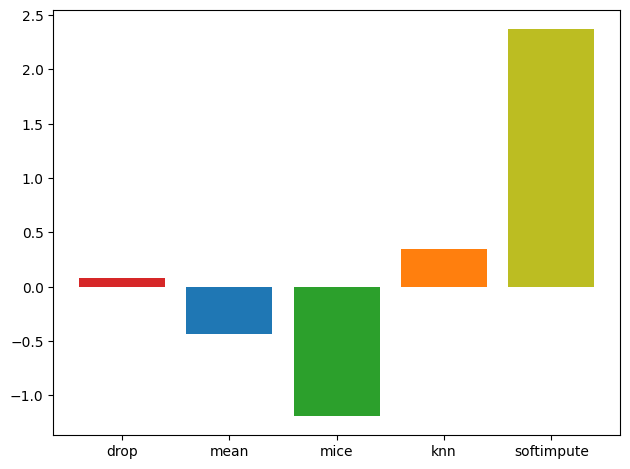

PR acc
31    0.25
32   -0.05
33   -0.02
34    0.34
35    0.13
Name: sp_acc, dtype: float64


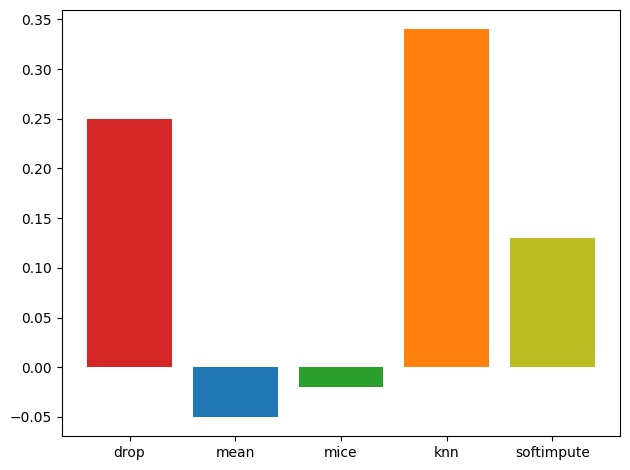

RBC acc
37    0.08
38   -0.28
39    0.04
40   -0.09
41    0.14
Name: sp_acc, dtype: float64


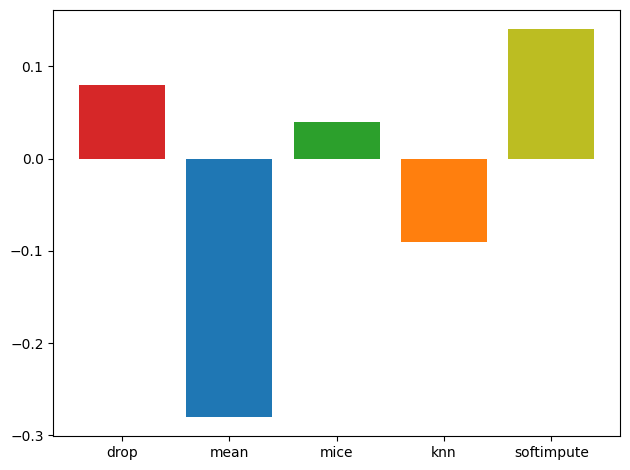

SVM acc
7    -1.82
8    -0.06
9     1.05
10   -2.53
11   -2.68
Name: sp_acc, dtype: float64


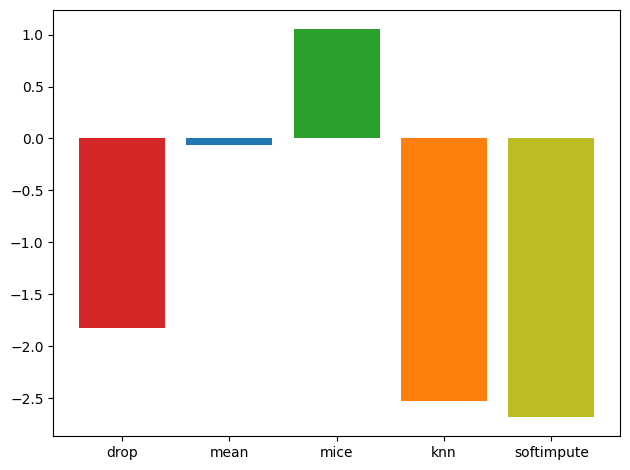

NB sr
1   -0.48
2   -0.41
3   -0.37
4    1.07
5    6.53
Name: sp_sr, dtype: float64


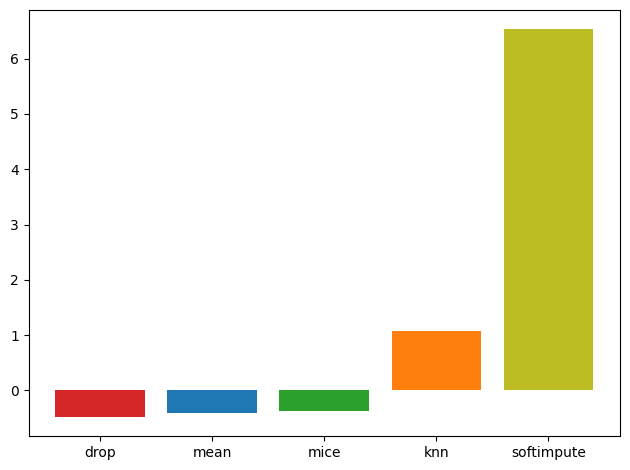

NN sr
25   -1.43
26   -1.66
27   -0.17
28   -2.07
29   -3.38
Name: sp_sr, dtype: float64


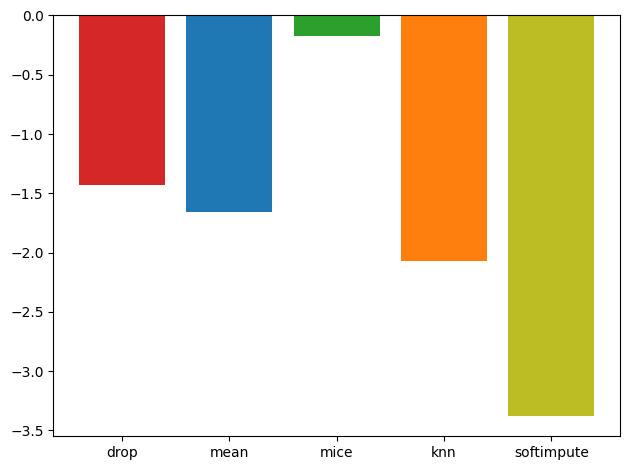

PR sr
31    0.22
32    0.49
33    0.37
34    2.43
35    0.74
Name: sp_sr, dtype: float64


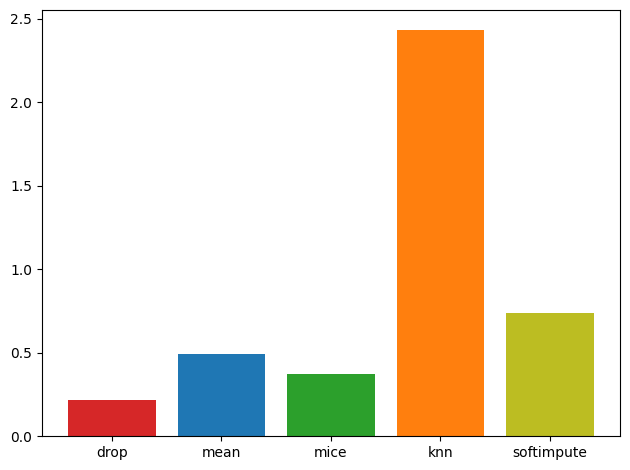

RBC sr
37    0.27
38   -0.33
39    0.77
40    0.52
41    1.81
Name: sp_sr, dtype: float64


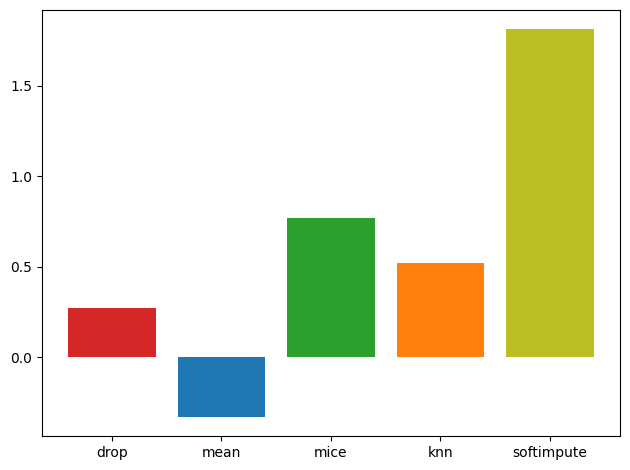

SVM sr
7    -0.01
8     0.30
9     2.23
10    1.65
11    0.88
Name: sp_sr, dtype: float64


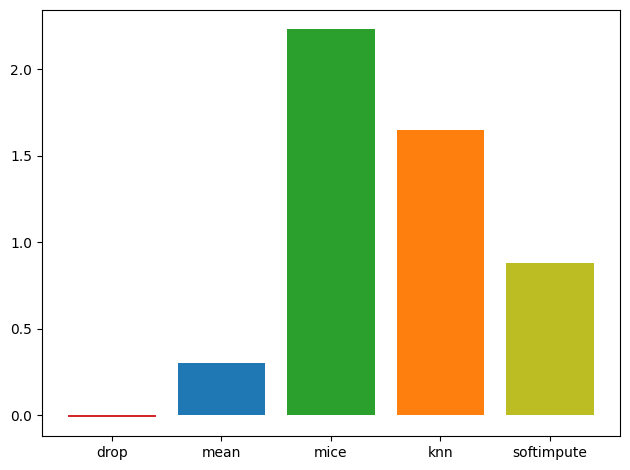

NB fpr
1   -0.71
2   -0.62
3   -0.56
4    1.39
5    8.51
Name: sp_fpr, dtype: float64


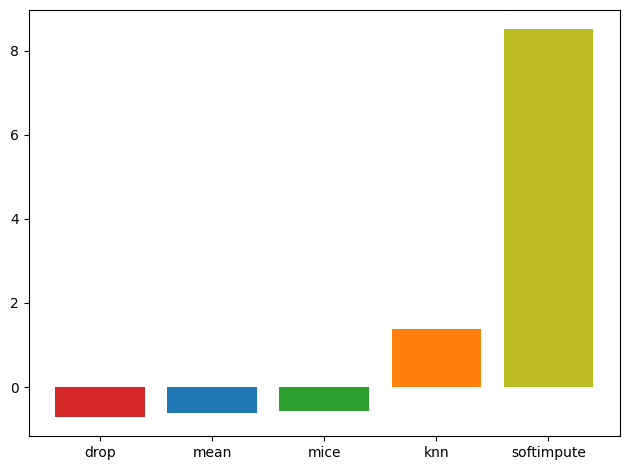

NN fpr
25   -1.32
26   -1.62
27   -0.45
28   -1.81
29   -2.03
Name: sp_fpr, dtype: float64


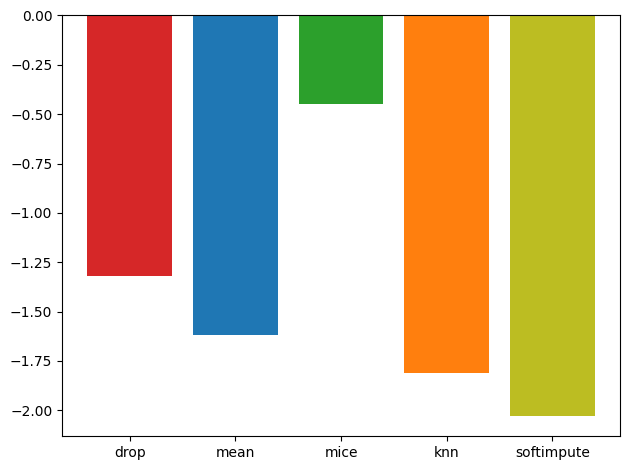

PR fpr
31    0.13
32    0.70
33    0.41
34    2.49
35    0.43
Name: sp_fpr, dtype: float64


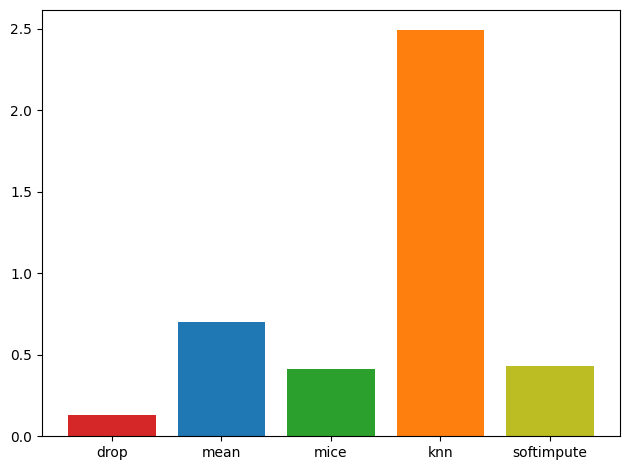

RBC fpr
37    0.66
38   -0.50
39    1.29
40    0.56
41    2.29
Name: sp_fpr, dtype: float64


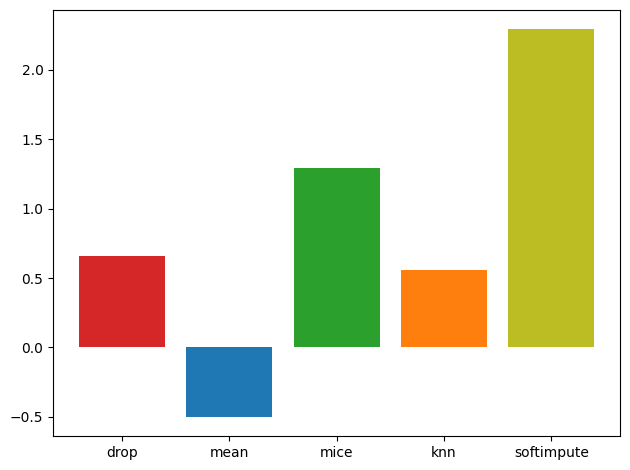

SVM fpr
7    -0.04
8    -0.22
9     0.11
10    0.32
11    0.14
Name: sp_fpr, dtype: float64


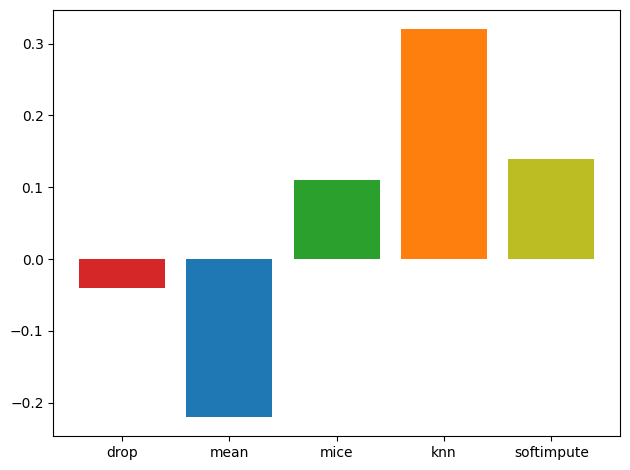

<Figure size 640x480 with 0 Axes>

In [14]:
plot_classifiers()

[0. 1. 2. 3. 4.] 0.33999999999999997


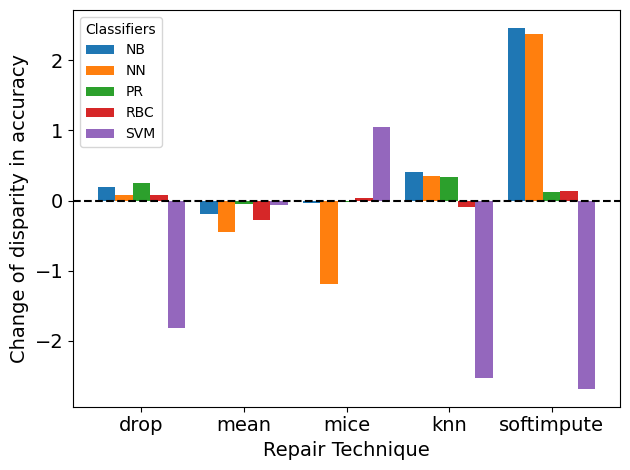

[0. 1. 2. 3. 4.] 0.33999999999999997


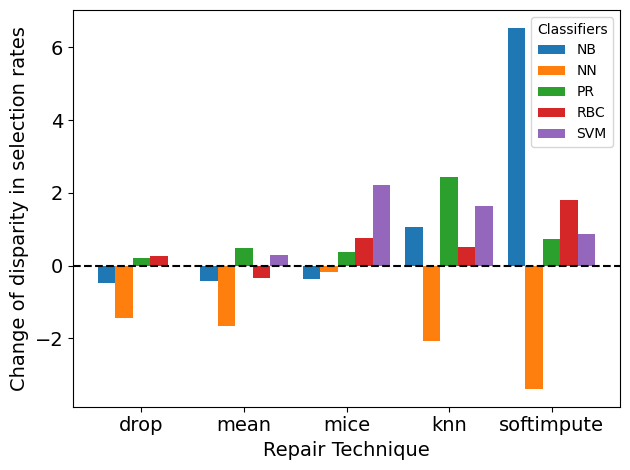

[0. 1. 2. 3. 4.] 0.33999999999999997


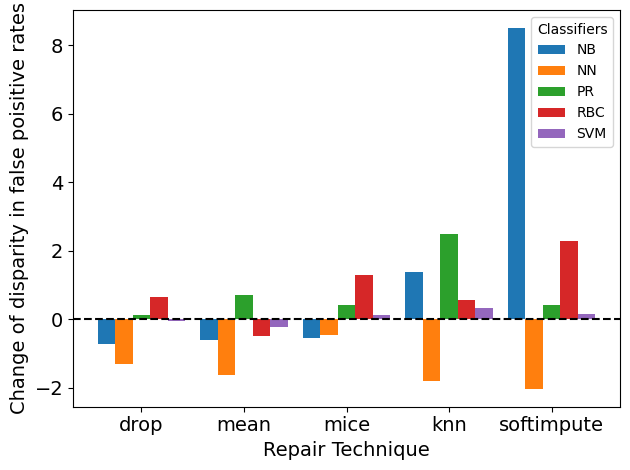

<Figure size 640x480 with 0 Axes>

In [15]:
plot_three_figures('classifiers')

In [16]:
def plot_changes(what, gs, method):
    stats = pd.read_csv(f'outputs/synthetic/pred_changes/pred_changes_{gs}_{method}.tsv', sep='\t')
    stats.columns = ['s', 'y', 'rs'] + list(stats.columns[3:])
    stats.set_index(['s', 'y', 'rs'], inplace=True)
    vals = []
    for y, s in itertools.product([0, 1], [0, 1]):
        print(s, y)
        group = stats.loc[s, y, :]
        vals.append(group[what].mean())
    
    plt.bar([0, 1], vals[:2], hatch=['/', 'o'])
    plt.bar([2, 3], vals[2:], hatch=['/', 'o'])
    
    plt.xticks(range(4), ['(u, -)', '(p, -)', '(u, +)', '(p, +)'])
    plt.show()
    plt.clf()

In [17]:
# plot_changes('rank_change', 0, 'mean')
# plot_changes('rank_change', -3, 'mean')
# plot_changes('rank_change', -3, 'knn')
# plot_changes('rank_change', -3, 'mice')
# plot_changes('rank_change', 3, 'mean')

In [18]:
def plot_changes_by_y(what, y, loc='best'):
    vals = []
    for gs, method in [(0, 'mean'), (-3, 'mean'), (-3, 'knn'), (-3, 'mice'), (3, 'mean')]:
        stats = pd.read_csv(f'outputs/synthetic/pred_changes/pred_changes_{gs}_{method}.tsv', sep='\t')
        stats.columns = ['s', 'y', 'rs'] + list(stats.columns[3:])
        stats.set_index(['s', 'y', 'rs'], inplace=True)
        for s in [0, 1]:
            # print(s, y)
            group = stats.loc[s, y, :]
            vals.append(group[what].mean())

    # print(vals)

    width = 0.3  # the width of the bars
    multiplier = 0
    rects = plt.bar(np.arange(5), vals[1:10:2], width, label='Privileged')
    plt.bar_label(rects, padding=3, rotation=90, fontsize='small', fmt='%0.2f')

    offset = width * 1
    rects = plt.bar(np.arange(5) + offset, vals[0:10:2], width, label='Unprivileged')
    plt.bar_label(rects, padding=3, rotation=90, fontsize='small', fmt='%0.2f')

    vals = np.array(vals)
    plt.ylim(vals.min() -  5, vals.max() + 15)
    plt.legend(loc=loc)
    plt.xticks(np.arange(5) + width/2, ['(0, Mean)', '(-3, Mean)', '(-3, k-NN)' , '(-3, MICE)', '(3, Mean)'])
    if what in ['proba_less', 'proba_great']:
        plt.ylabel(f'Perecntage of {"positive" if y == 1 else "negative"} individuals receiving\nreceiving {"lower" if what == "proba_less" else "higher"} prediction probability.')
    else:
        plt.ylabel('Average change in rank.')
    plt.xlabel('(Group-Shift, Method)')
    plt.tight_layout()
    os.makedirs('outputs/synthetic/pred_changes/figure/', exist_ok=True)
    plt.savefig(f'outputs/synthetic/pred_changes/figure/{what}_{y}.pdf', format='pdf')
    plt.show()
    plt.clf()

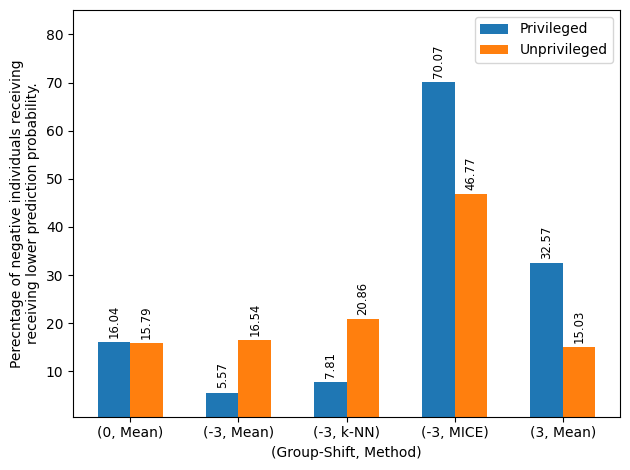

<Figure size 640x480 with 0 Axes>

In [19]:
plot_changes_by_y('proba_less', 0, 'best')

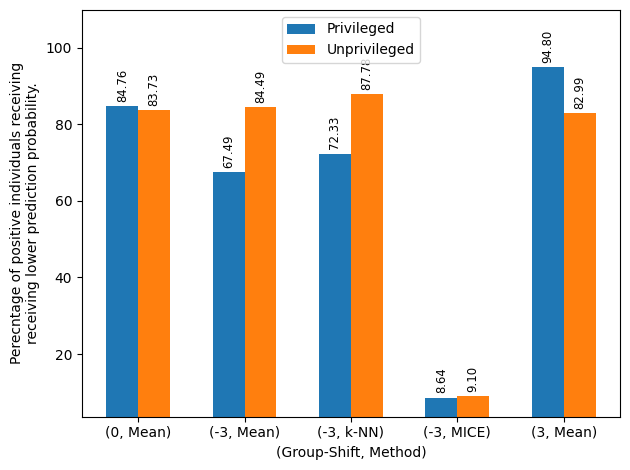

<Figure size 640x480 with 0 Axes>

In [20]:
plot_changes_by_y('proba_less', 1, 'upper center')

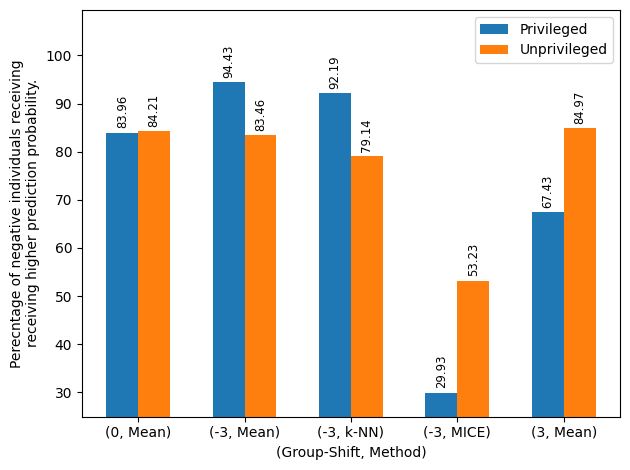

<Figure size 640x480 with 0 Axes>

In [21]:
plot_changes_by_y('proba_great', 0, 'best')

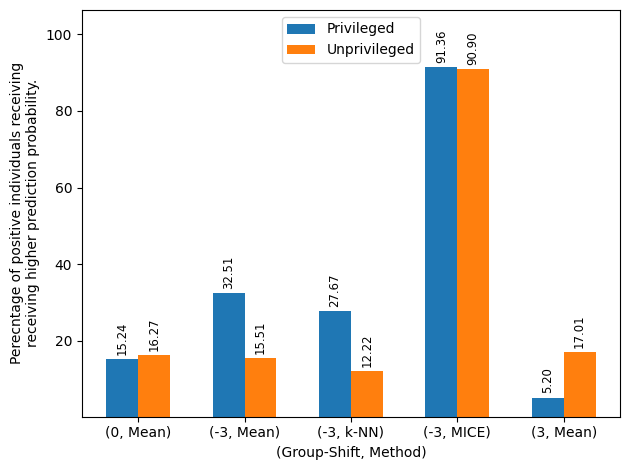

<Figure size 640x480 with 0 Axes>

In [22]:
plot_changes_by_y('proba_great', 1, 'upper center')

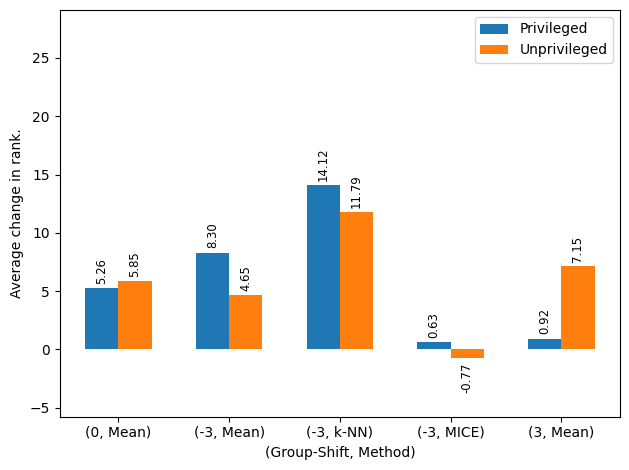

<Figure size 640x480 with 0 Axes>

In [23]:
plot_changes_by_y('rank_change', 0, 'best')

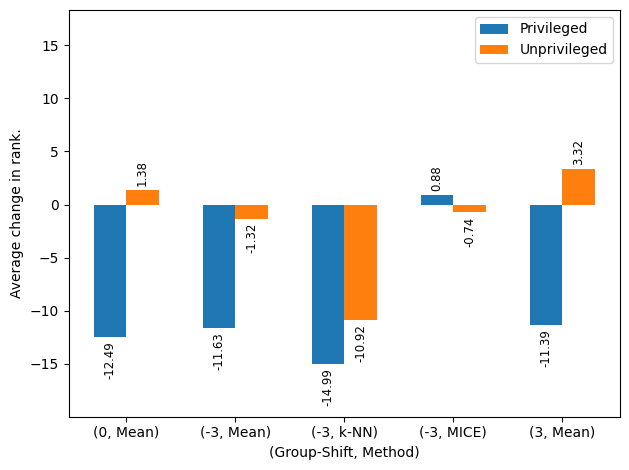

<Figure size 640x480 with 0 Axes>

In [24]:
plot_changes_by_y('rank_change', 1, 'best')

In [25]:
df = pd.read_csv('outputs/synthetic/tables/corr_-3_tm.tsv', sep='\t', header=None)
df.columns = ['method', 'sp_acc', 'sp_acc_var', 'sp_sr', 'sp_sr_var', 'sp_fpr', 'sp_fpr_var']
df

,method,sp_acc,sp_acc_var,sp_sr,sp_sr_var,sp_fpr,sp_fpr_var
0,baseline,0.10,0.12,-8.06,0.03,-8.16,0.12
1,drop,1.03,0.08,-8.00,0.06,-9.03,0.11
2,mean,3.57,0.11,-10.63,0.08,-14.20,0.18
3,mice,3.24,0.10,-10.32,0.05,-13.56,0.10
4,knn,4.57,0.29,-10.69,0.30,-15.26,0.52
5,softimpute,4.65,0.03,-6.24,0.13,-10.89,0.13


 acc
0.93
False
[0. 1. 2. 3. 4.] 0.0


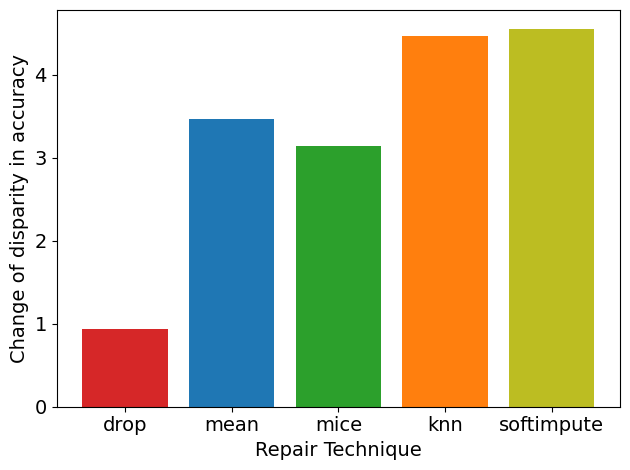

 sr
-1.8200000000000003
True
[0. 1. 2. 3. 4.] 0.0


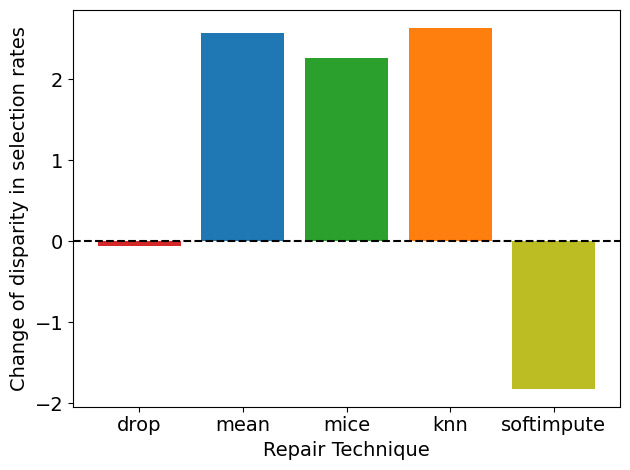

 fpr
0.8699999999999992
False
[0. 1. 2. 3. 4.] 0.0


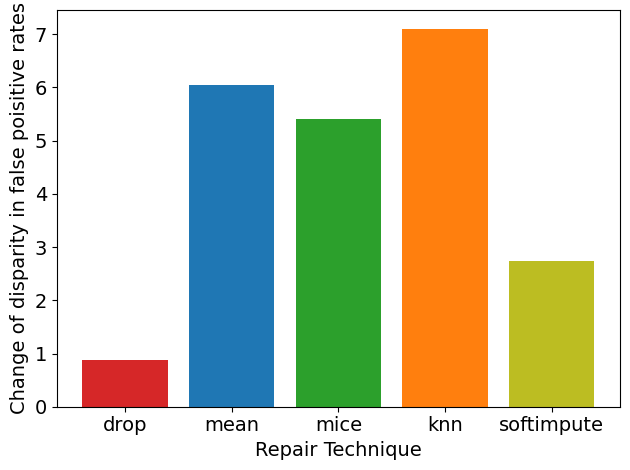

<Figure size 640x480 with 0 Axes>

In [26]:
for stat in ['acc', 'sr', 'fpr']:
    grouped = [('', df)]
    bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:olive', 'tab:brown']
    width = 0.85 / len(grouped)
    less_than_zero = False
    for i, (tup, grp) in enumerate(grouped):
        grp[f'sp_{stat}'] = grp[f'sp_{stat}'].apply(np.abs)
        baseline = grp[grp['method'] == 'baseline'] 
        grp = grp[grp['method'] != 'baseline']
        print(tup, stat)
        print((grp[f'sp_{stat}'] - baseline.iloc[0][f'sp_{stat}']).min())
        if (grp[f'sp_{stat}'] - baseline.iloc[0][f'sp_{stat}']).min() < 0:
            less_than_zero = True
        print(less_than_zero)
        plt.bar(np.arange(len(grp)) + width * i , grp[f'sp_{stat}'] - baseline.iloc[0][f'sp_{stat}'], color=bar_colors)
    print(np.arange(len(grp)) + width * len(grouped) // 2, width * 1.0 * (len(grouped)//2))
    plt.xticks(np.arange(len(grp)) + width * (len(grouped) // 2), grp['method'], fontsize=14)
    plt.yticks(fontsize=14)
    if less_than_zero:
        plt.axhline(0, color='black', linestyle='dashed')
    plt.xlabel('Repair Technique', fontsize=14)
    plt.ylabel(f'Change of disparity in {stat_to_str[stat]}', fontsize=14)
    plt.tight_layout()
    target_dir = out_dir + f'synthetic/figures/test_missing/'
    os.makedirs(target_dir, exist_ok=True)
    plt.savefig(f'{target_dir}/{stat}.pdf')
    plt.show()
    plt.clf()

Pred Changes in real data

In [27]:
def plot_changes_by_y_real(what, y, loc='best'):
    vals = []
    dbs = ['compas', 'folkincome', 'german', 'pima', 'heart']
    for db in dbs:
        stats = pd.read_csv(f'outputs/standard/{db}/pred_changes/pred_changes_{db}_1.tsv', sep='\t')
        stats.columns = ['s', 'y', 'rs'] + list(stats.columns[3:])
        if db == 'german':
            stats['y'] = stats['y'] - 1
        stats.set_index(['s', 'y', 'rs'], inplace=True)
        for s in [0, 1]:
            print(db, s, y)
            group = stats.loc[s, y, :]
            vals.append(group[what].mean())

    # print(vals)

    width = 0.3  # the width of the bars
    multiplier = 0
    rects = plt.bar(np.arange(5), vals[1:10:2], width, label='Privileged')
    plt.bar_label(rects, padding=3, rotation=90, fontsize='small', fmt='%0.2f')

    offset = width * 1
    rects = plt.bar(np.arange(5) + offset, vals[0:10:2], width, label='Unprivileged')
    plt.bar_label(rects, padding=3, rotation=90, fontsize='small', fmt='%0.2f')

    vals = np.array(vals)
    plt.ylim(vals.min() -  5, vals.max() + 15)
    plt.legend(loc=loc)
    plt.xticks(np.arange(5) + width/2, dbs)
    if what in ['proba_less', 'proba_great']:
        plt.ylabel(f'Perecntage of {"positive" if y == 1 else "negative"} individuals receiving\nreceiving {"higher" if what == "proba_less" else "Lower"} prediction probability.')
    else:
        plt.ylabel('Average change in rank.')
    plt.xlabel('(Group-Shift, Method)')
    plt.tight_layout()
    os.makedirs('outputs/standard/figures/pred_changes', exist_ok=True)
    plt.savefig(f'outputs/standard/figures/pred_changes/{what}_{y}.pdf', format='pdf')
    plt.show()
    plt.clf()

In [28]:
db = 'compas'
df = pd.read_csv(f'outputs/standard/{db}/pred_changes/pred_changes_{db}_1.tsv', sep='\t')
df.columns = ['s', 'y', 'rs'] + list(df.columns[3:])
df.head()

,s,y,rs,proba_less,proba_great,proba_change,rank_less,rank_great,rank_change
0,0.0,0.0,11,47.058824,52.941176,0.000501,4.901961,2.614379,-0.411765
1,0.0,1.0,11,58.045977,41.954023,-0.000165,3.160920,0.574713,-0.752874
2,1.0,0.0,11,33.992095,66.007905,0.001577,1.976285,9.486166,1.466403
3,1.0,1.0,11,44.295302,55.704698,0.001169,2.013423,3.355705,0.114094
4,0.0,0.0,13,62.745098,37.254902,-0.000646,11.111111,2.941176,-0.535948


compas 0 1
compas 1 1
folkincome 0 1
folkincome 1 1
german 0 1
german 1 1
pima 0 1
pima 1 1
heart 0 1
heart 1 1


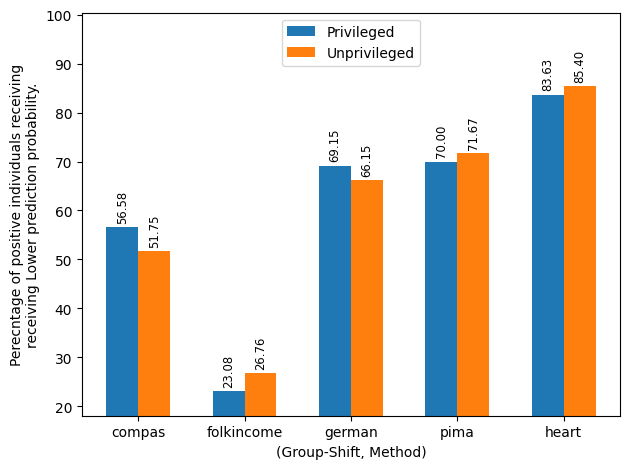

<Figure size 640x480 with 0 Axes>

In [29]:
plot_changes_by_y_real('proba_great', 1, 'upper center')

compas 0 0.0
compas 1 0.0
folkincome 0 0.0
folkincome 1 0.0
german 0 0.0
german 1 0.0
pima 0 0.0
pima 1 0.0
heart 0 0.0
heart 1 0.0


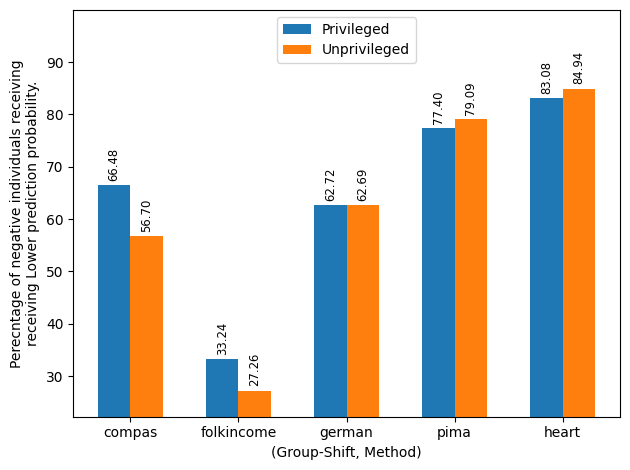

<Figure size 640x480 with 0 Axes>

In [30]:
plot_changes_by_y_real('proba_great', 0.0, 'upper center')

compas 0 1
compas 1 1
folkincome 0 1
folkincome 1 1
german 0 1
german 1 1
pima 0 1
pima 1 1
heart 0 1
heart 1 1


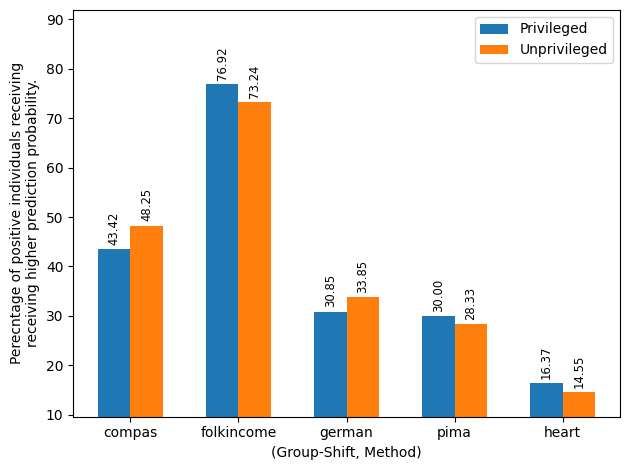

<Figure size 640x480 with 0 Axes>

In [31]:
plot_changes_by_y_real('proba_less', 1, 'best')

compas 0 0.0
compas 1 0.0
folkincome 0 0.0
folkincome 1 0.0
german 0 0.0
german 1 0.0
pima 0 0.0
pima 1 0.0
heart 0 0.0
heart 1 0.0


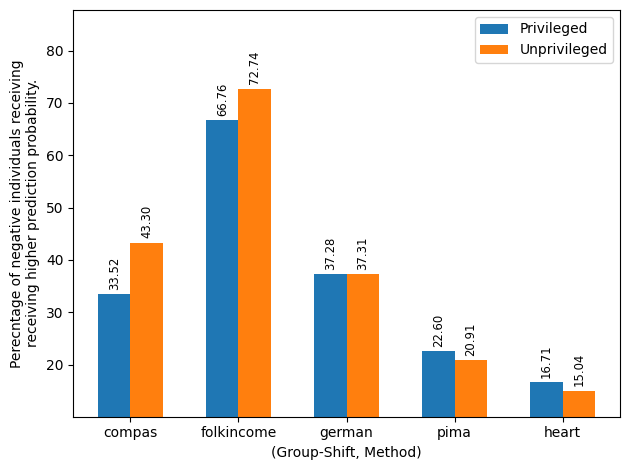

<Figure size 640x480 with 0 Axes>

In [32]:
plot_changes_by_y_real('proba_less', 0.0, 'best')

compas 0 1
compas 1 1
folkincome 0 1
folkincome 1 1
german 0 1
german 1 1
pima 0 1
pima 1 1
heart 0 1
heart 1 1


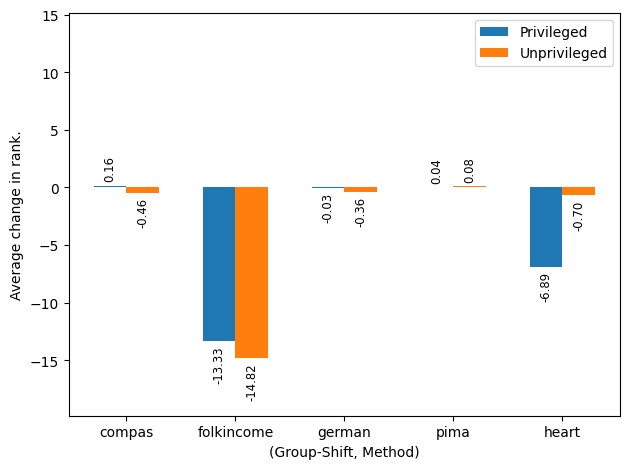

<Figure size 640x480 with 0 Axes>

In [33]:
plot_changes_by_y_real('rank_change', 1, 'best')

compas 0 0
compas 1 0
folkincome 0 0
folkincome 1 0
german 0 0
german 1 0
pima 0 0
pima 1 0
heart 0 0
heart 1 0


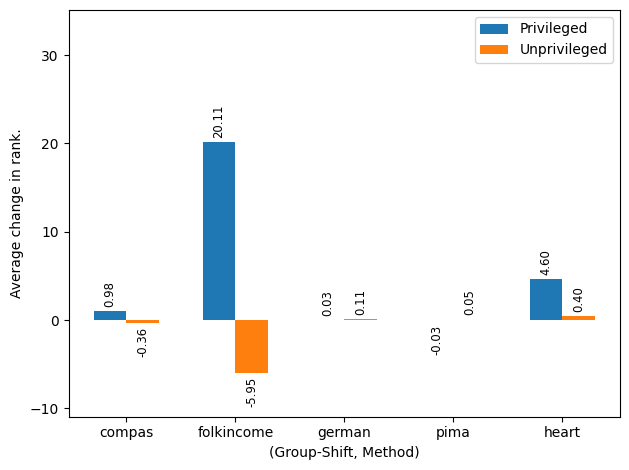

<Figure size 640x480 with 0 Axes>

In [34]:
plot_changes_by_y_real('rank_change', 0, 'best')

In [52]:
df = pd.read_csv('outputs/synthetic/vary_upic.tsv', sep='\t', index_col=None)
df.columns

Index(['method', 'ppic', 'upic', 'AC_p', 'AC_u', 'SR_p', 'SR_u', 'FPR_p',
       'FPR_u'],
      dtype='object')

baseline
drop
iterative_imputer.mice
knn_imputer
simple_imputer.mean
softimpute


Text(0.5, 0, 'Rate of missing value in the unprivileged group.')

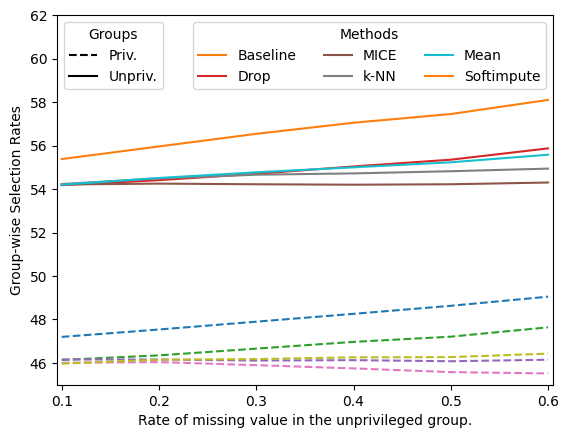

In [97]:
grouped = df.groupby('method')
for tup, grp in grouped:
    print(tup)
    plt.plot(grp['upic'], grp['SR_p'], label=tup, linestyle='dashed')
    plt.plot(grp['upic'], grp['SR_u'], label=tup)

handles, labels = plt.gca().get_legend_handles_labels()
method_handles, method_labels = [], []
legend_map = {'baseline': 'Baseline', 'drop': 'Drop', 
             'iterative_imputer.mice': 'MICE', 'knn_imputer': 'k-NN',
             'simple_imputer.mean': 'Mean', 'softimpute': 'Softimpute'}
for i in range(len(handles)):
    if i % 2 == 1:
        method_handles.append(handles[i])
        method_labels.append(legend_map[labels[i]])
        
legend = plt.gca().legend(method_handles, method_labels, ncols=3, title='Methods', loc='upper right')

handles, labels = plt.gca().get_legend_handles_labels()
group_handles, group_labels = [handles[0], handles[1]], ['Priv.', 'Unpriv.']
for h in group_handles:
    h.set_color('black')
plt.legend(group_handles, group_labels, loc='upper left', title='Groups')
plt.gca().add_artist(legend)

plt.xlim(0.095, 0.605)
plt.ylim(45, 62)
plt.ylabel('Group-wise Selection Rates')
plt.xlabel('Rate of missing value in the unprivileged group')